### Задание №1

In [1]:
import numpy as np
import pandas as pd

Набор данных Boston House Prices

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Данные о недвижимости

In [5]:
data = boston.data

In [6]:
data.shape

(506, 13)

In [7]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
# Величина, которую требуется предсказать (цена на недвижимость)
target = boston.target

In [9]:
# Названия признаков
feature_names = boston.feature_names
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
# Описание датасета построчно
for line in boston.DESCR.split('\n'):
    print (line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
# Датафрейм с описанием квартир
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
X.shape

(506, 13)

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [14]:
# Датафрейм с ценами на недвижимость (Данные о целевой переменной)
Y = pd.DataFrame(target, columns=['price'])

In [15]:
Y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [16]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


In [17]:
# Разбиваем данные на тренировочный и тестовый датасеты
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [19]:
Y_train.shape

(354, 1)

In [20]:
X_train.shape

(354, 13)

In [21]:
# Построение модели линейной регрессии
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()

In [23]:
# Тренировка модели
lr.fit(X_train, Y_train)

LinearRegression()

In [24]:
Y_pred = lr.predict(X_test)

In [25]:
check_test = pd.DataFrame({'Y_test': Y_test['price'],
                           'Y_pred': Y_pred.flatten()},
                          columns=['Y_test', 'Y_pred'])

In [26]:
check_test.head(10)

,Y_test,Y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


#### Метрики оценки качества работы регрессивных моделей:

In [27]:
# Средняя квадратичная ошибка
check_test['error'] = check_test['Y_pred'] - check_test['Y_test']
check_test.head(10)

,Y_test,Y_pred,error
173,23.6,28.648960,5.048960
274,32.4,36.495014,4.095014
491,13.6,15.411193,1.811193
72,22.8,25.403213,2.603213
452,16.1,18.855280,2.755280
76,20.0,23.146689,3.146689
316,17.8,17.392124,-0.407876
140,14.0,14.078599,0.078599
471,19.6,23.036927,3.436927
500,16.8,20.599433,3.799433


In [28]:
# Вручную
initial_mse = (check_test['error'] ** 2).mean()
initial_mse

21.517444231177368

In [29]:
# С помощью функции
from sklearn.metrics import mean_squared_error

In [30]:
initial_mse = mean_squared_error(Y_test, Y_pred)
initial_mse

21.517444231177368

In [31]:
# Средняя абсолютная ошибка
(np.abs(check_test['error'])).mean()

3.162709871457422

In [32]:
from sklearn.metrics import mean_absolute_error

In [33]:
mean_absolute_error(Y_test, Y_pred)

3.162709871457422

In [34]:
# R2
from sklearn.metrics import r2_score

In [35]:
r2_score(Y_test, Y_pred)

0.7112260057484912

#### Просмотр коэффициентов линейной регрессии

In [36]:
# W0 - свободный коэффициент
lr.intercept_

array([31.63108404])

In [37]:
# W1 ... Wm - Вес признака
lr.coef_

array([[-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,
         3.11983512e+00, -1.54170609e+01,  4.05719923e+00,
        -1.08208352e-02, -1.38599824e+00,  2.42727340e-01,
        -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
        -5.47113313e-01]])

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

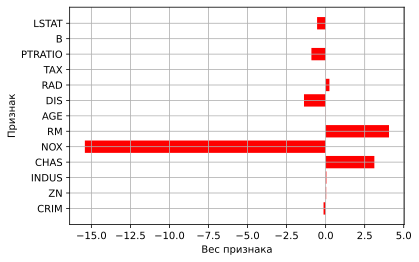

In [39]:
plt.barh(X_train.columns, lr.coef_.flatten(), color='r')
plt.grid(True)
plt.xlabel('Вес признака')
plt.ylabel('Признак')
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
X_train_scaled = scaler.fit_transform(X_train)

In [43]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [44]:
X_test_scaled = scaler.transform(X_test)

In [45]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [46]:
lr.fit(X_train_scaled, Y_train)

LinearRegression()

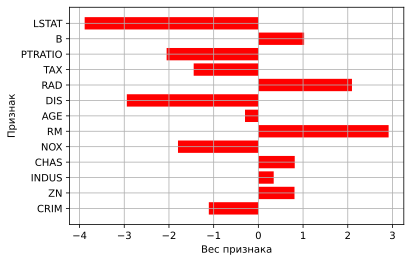

In [47]:
plt.barh(X_train.columns, lr.coef_.flatten(), color='r')
plt.grid(True)
plt.xlabel('Вес признака')
plt.ylabel('Признак')
plt.show()

In [48]:
# Исключим признаки с весом <0.5
important_features = [
    feature
    for feature, weight in zip(feature_names, lr.coef_.flatten())
    if np.abs(weight) > 0.5
]

print(important_features)

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [49]:
# Расчёт построчно
# Обучение модели
lr.fit(X_train_scaled.loc[:, important_features], Y_train)
# Тестирование модели
Y_pred = lr.predict(X_test_scaled.loc[:, important_features])
# Проверка качества работы модели
mse2 = mean_squared_error(Y_test, Y_pred)
# Сравнение результатов работы по всем признакам и по наиболее важным признакам
print(f'mse до: {initial_mse}')
print(f'mse после: {mse2}')

mse до: 21.517444231177368
mse после: 21.2433903455094


In [50]:
# Через создание функции
def create_model(X_train, Y_train, X_test, Y_test, important_features, model):
    model.fit(X_train_scaled.loc[:, important_features], Y_train)
    Y_train=model.predict(X_test_scaled.loc[:, important_features])
    mse = mean_squared_error(Y_test, Y_pred)
    return mse

In [51]:
create_model(X_train_scaled, Y_train, X_test_scaled, Y_test, important_features, lr)

21.2433903455094

In [52]:
initial_mse

21.517444231177368

Значение ошибки немного уменьшилось. Соответственно - удаление малозначительных признаков INDUS и AGE дало положительный эффект